In [1]:
# Estas líneas sirven para que el código se actualice automáticamente.
# Así, si se realiza un cambio en los paquetes importados, no se tiene que reiniciar todo el notebook para ver reflejados los cambios.
# Es como tener un "refresco" automático para el programa.
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Este comando indica a matplotlib que muestre los gráficos directamente en
# la salida de la celda de Jupyter Notebook. Sin esto, los gráficos podrían
# abrirse en una ventana aparte.
%matplotlib inline

In [2]:
# Ejemplo de Árboles de Decisión aplicado al dataset de las orquídeas (Iris)
# ==================================================================================
# Importamos las bibliotecas necesarias para el análisis de datos, visualización y el modelo de árbol de decisión.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# Establecer estilo de seaborn
sns.set(style="whitegrid")

In [3]:
# Configuración de los gráficos de matplotlib
# ============================================
plt.rcParams['figure.figsize'] = [10, 6]  # Tamaño de figura por defecto (ancho, alto) en pulgadas
plt.rcParams['figure.dpi'] = 100  # Resolución en puntos por pulgada (DPI). 100 es un buen valor general.
plt.rcParams['font.size'] = 12 #Tamaño de fuente

In [4]:
# Cargar el dataset de las orquídeas (Iris)
# =========================================
# Esta función hace lo siguiente:
# 1. Carga un conjunto de datos llamado "Iris" que contiene información sobre flores.
# 2. Convierte esos datos en una tabla fácil de usar (llamada DataFrame).
# 3. Añade una columna a la tabla que indica el tipo de flor (especie).
# 4. Muestra en la pantalla:
#    - Cuántas filas y columnas tiene la tabla.
#    - Las primeras 5 filas de la tabla para que veas cómo son los datos.
#    - Un resumen estadístico de los datos numéricos.
# 5. Finalmente, la función devuelve la tabla, una lista con los nombres de
#    las columnas que representan las características de las flores y la
#    lista de objetivos.

def cargar_datos():
    """
    Carga el dataset de Iris y lo prepara para su uso.
    Muestra las primeras filas y estadísticas descriptivas del dataset.

    Returns:
        df (pd.DataFrame): DataFrame con los datos de las flores.
        feature_names (list): Lista con los nombres de las características.
        target_names (list): Lista con los nombres de las clases.
    """
    print("Cargando el dataset de las orquídeas (Iris)...")
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    df['species'] = df['target'].map({
        0: 'Iris-setosa',
        1: 'Iris-versicolor',
        2: 'Iris-virginica'
    })

    print("Dimensiones del dataset:", df.shape)
    print("\nPrimeras filas del dataset:")
    print(df.head())

    print("\nEstadísticas descriptivas:")
    print(df.describe())

    return df, iris.feature_names, iris.target_names

In [5]:
# Visualización de los datos
# =========================
# Esta función crea cuatro gráficos, uno para cada medida de las flores (largo y ancho de sépalos y pétalos).
# Cada gráfico muestra barras de diferentes colores, donde cada color representa una especie de Iris,
# y la altura de la barra muestra cuántas flores tienen esa medida en particular.

def visualizar_datos(df):
    """
    Visualiza la distribución de las características de las orquídeas

    Args:
        df (pd.DataFrame): DataFrame con los datos de las flores
    """
    print("\nVisualizando la distribución de las características...")

    plt.figure(figsize=(15, 10))

    # Histogramas de cada característica por especie
    for i, feature in enumerate(df.columns[:4]):
        plt.subplot(2, 2, i+1)
        sns.histplot(data=df, x=feature, hue='species', multiple='stack', palette='viridis', bins=10)
        plt.title(f'Distribución de {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

Cargando el dataset de las orquídeas (Iris)...
Dimensiones del dataset: (150, 6)

Primeras filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target      species  
0       0  Iris-setosa  
1       0  Iris-setosa  
2       0  Iris-setosa  
3       0  Iris-setosa  
4       0  Iris-setosa  

Estadísticas descriptivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866

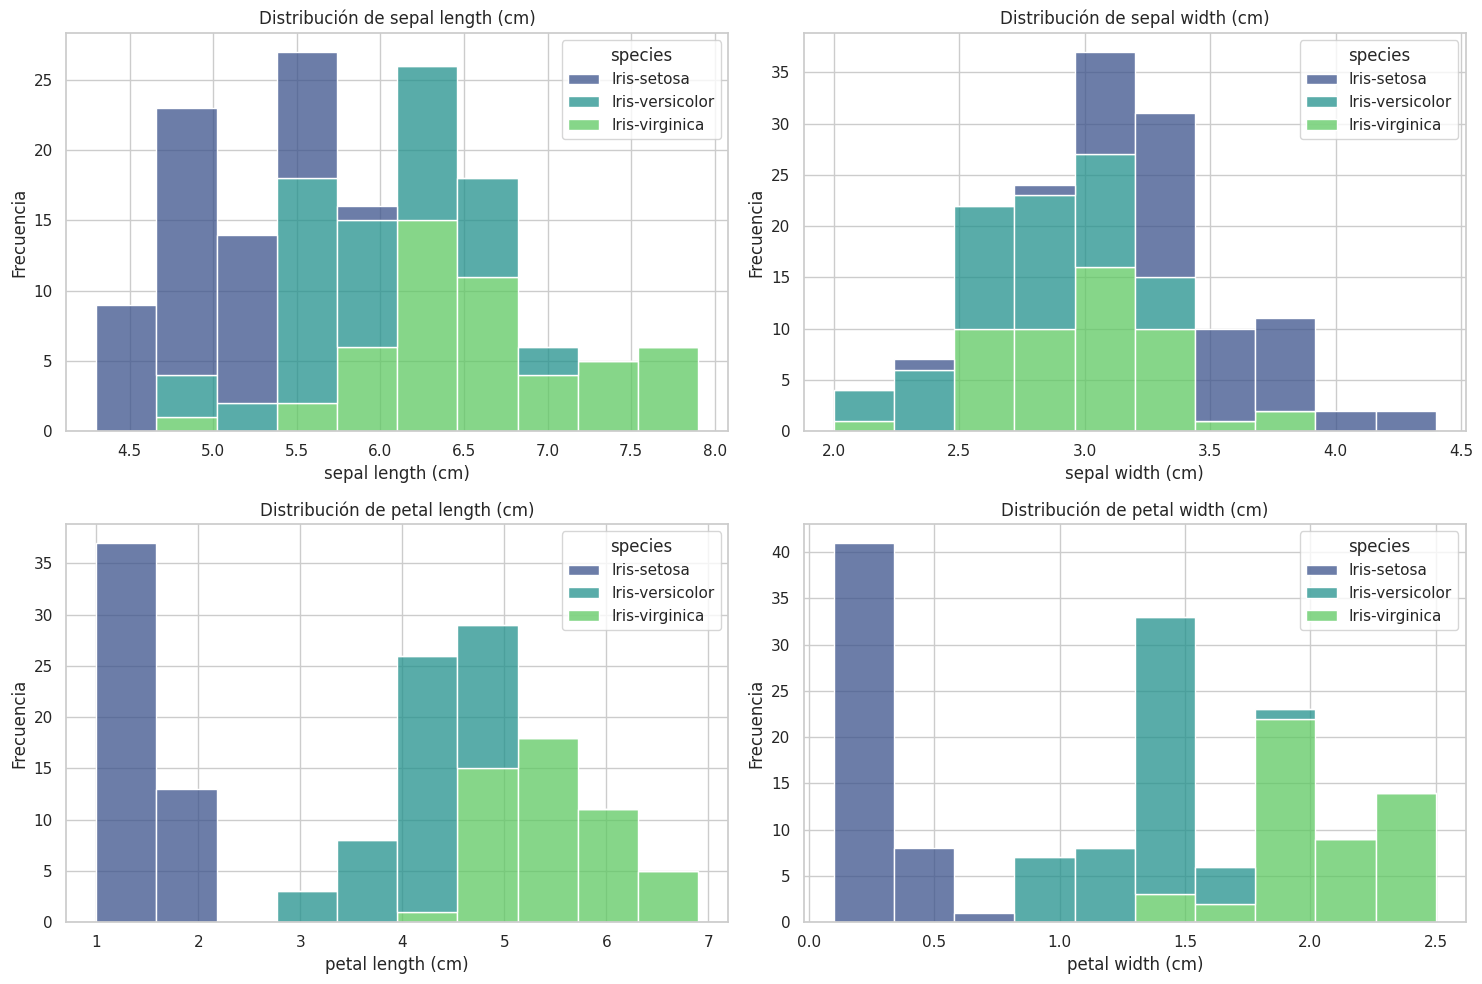

In [6]:
# Carga y visualiza los datos de las Iris
# =========================
# Llama a la función cargar_datos() para obtener el DataFrame (df) y los nombres de las columnas (feature_names).
# Luego, llama a la función visualizar_datos() pasando el DataFrame para generar las visualizaciones.

# Cargar y explorar los datos
df, feature_names, target_names = cargar_datos()

# Visualizar los datos
visualizar_datos(df)

In [7]:
# Crear y entrenar el árbol de decisión
# =====================================
# Esta función crea y entrena un modelo de árbol de decisión para clasificar flores Iris.
# 1. Toma un DataFrame (df) con los datos y una lista con los nombres de las características (feature_names).
# 2. Separa los datos en características (X) y etiquetas (y).
# 3. Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%).
# 4. Crea un clasificador de árbol de decisión.
# 5. Entrena el clasificador con los datos de entrenamiento.
# 6. Evalúa la precisión del clasificador con los datos de prueba.
# 7. Imprime la precisión del árbol.
# 8. Devuelve el clasificador entrenado y los conjuntos de prueba (X_test, y_test).

def crear_entrenar_arbol(df, feature_names):
    """
    Crea y entrena un árbol de decisión basado en las características de las orquídeas.
    Evalúa la precisión del modelo con datos de prueba.

    Args:
        df (pd.DataFrame): DataFrame con los datos de las flores.
        feature_names (list): Lista con los nombres de las características.

    Returns:
        clf (DecisionTreeClassifier): Clasificador de árbol de decisión entrenado.
        X_test (numpy.ndarray): Datos de prueba para las características.
        y_test (numpy.ndarray): Etiquetas correspondientes a los datos de prueba.
    """
    print("\nCreando y entrenando el árbol de decisión...")

    # Separar características y etiquetas
    X = df[feature_names].values
    y = df['target'].values

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear el clasificador de árbol de decisión
    clf = DecisionTreeClassifier(random_state=42)

    # Entrenar el clasificador
    clf.fit(X_train, y_train)

    # Evaluar el clasificador
    accuracy = clf.score(X_test, y_test)
    print(f"\nPrecisión del árbol de decisión: {accuracy:.4f}")

    return clf, X_test, y_test

# Generar reglas basadas en el árbol de decisión
# ==============================================
# Esta función genera y muestra las reglas de clasificación del árbol de decisión entrenado.
# 1. Toma el clasificador de árbol de decisión (clf), los nombres de las características
#    (feature_names), y los nombres de las clases (target_names).
# 2. Usa la función export_text para extraer las reglas del árbol en formato texto.
# 3. Imprime las reglas en la consola.

def generar_reglas(clf, feature_names, target_names):
    """
    Genera y muestra las reglas del árbol de decisión.

    Args:
        clf (DecisionTreeClassifier): Clasificador de árbol de decisión entrenado.
        feature_names (list): Lista con los nombres de las características.
        target_names (list): Lista con los nombres de las clases.
    """
    print("\nGenerando reglas del árbol de decisión...")
    reglas = export_text(clf, feature_names=feature_names, show_weights=True)
    print("\nReglas del árbol de decisión:")
    print(reglas)

In [8]:
# Visualizar el árbol de decisión
# ===============================
# Esta función visualiza el árbol de decisión entrenado como un diagrama.
# 1. Toma el clasificador de árbol de decisión (clf), los nombres de las características (feature_names)
#    y los nombres de las clases (target_names).
# 2. Crea una figura de Matplotlib para el gráfico.
# 3. Usa la función plot_tree de sklearn para generar el diagrama del árbol.
#    - Los nodos se rellenan de color según la clase predicha (filled=True).
#    - Los nodos tienen esquinas redondeadas (rounded=True).
# 4. Muestra el diagrama del árbol.

def visualizar_arbol(clf, feature_names, target_names):
    """
    Visualiza el árbol de decisión.

    Args:
        clf (DecisionTreeClassifier): Clasificador de árbol de decisión entrenado.
        feature_names (list): Lista con los nombres de las características.
        target_names (list): Lista con los nombres de las clases.
    """
    print("\nVisualizando el árbol de decisión...")
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
    plt.show()

In [9]:
# Analizar un ejemplo específico
# ==============================
# Esta función analiza un ejemplo de flor Iris utilizando el árbol de decisión entrenado.
# 1. Toma el clasificador de árbol de decisión (clf), un diccionario con las características del ejemplo (ejemplo),
#    los nombres de las características (feature_names) y los nombres de las clases (target_names).
# 2. Convierte el diccionario 'ejemplo' en un DataFrame de Pandas.
# 3. Utiliza el árbol de decisión (clf) para predecir la clase más probable del ejemplo.
# 4. Obtiene las probabilidades de predicción para cada clase.
# 5. Imprime las características del ejemplo en un formato legible.
# 6. Imprime la especie predicha (el nombre de la clase con mayor probabilidad).
# 7. Imprime las probabilidades de pertenencia a cada clase.
# 8. Visualiza el árbol de decisión. (Nota: la visualización no resalta la ruta específica del ejemplo).

def analizar_ejemplo(clf, ejemplo):
    """
    Analiza un ejemplo específico utilizando el árbol de decisión.
    Muestra las características del ejemplo y las probabilidades de predicción.

    Args:
        clf (DecisionTreeClassifier): Clasificador de árbol de decisión entrenado.
        ejemplo (dict): Diccionario con las características del ejemplo.
    """
    print("\nAnalizando un ejemplo específico...")

    # Convertir el ejemplo a un DataFrame
    ejemplo_df = pd.DataFrame([ejemplo])

    # Predecir la clase del ejemplo
    predicted_class_index = clf.predict(ejemplo_df)[0]
    predicted_probability = clf.predict_proba(ejemplo_df)[0]

    species_name = target_names[predicted_class_index]
    print("\nCaracterísticas de la muestra:")
    for feature, value in ejemplo.items():
        print(f"- {feature.replace('_', ' ').capitalize()}: {value} cm")

    print(f"\nEspecie predicha: {species_name}")
    print("Probabilidades de predicción:")
    for i, prob in enumerate(predicted_probability):
        print(f"- {target_names[i]}: {prob:.4f}")

    # Visualizar el árbol de decisión con el ejemplo
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
    plt.show()

In [10]:
# Crear y entrenar el árbol de decisión
# ======================================
# Llama a la función para crear y entrenar el árbol de decision en el conjunto
# seleccionado para este notebook.
clf, X_test, y_test = crear_entrenar_arbol(df, feature_names)

# Genera las reglas y las muestra
generar_reglas(clf, feature_names, target_names)


Creando y entrenando el árbol de decisión...

Precisión del árbol de decisión: 1.0000

Generando reglas del árbol de decisión...

Reglas del árbol de decisión:
|--- petal length (cm) <= 2.45
|   |--- weights: [31.00, 0.00, 0.00] class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- weights: [0.00, 32.00, 0.00] class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- weights: [0.00, 0.00, 3.00] class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|   |   |   |   |   |-


Visualizando el árbol de decisión...


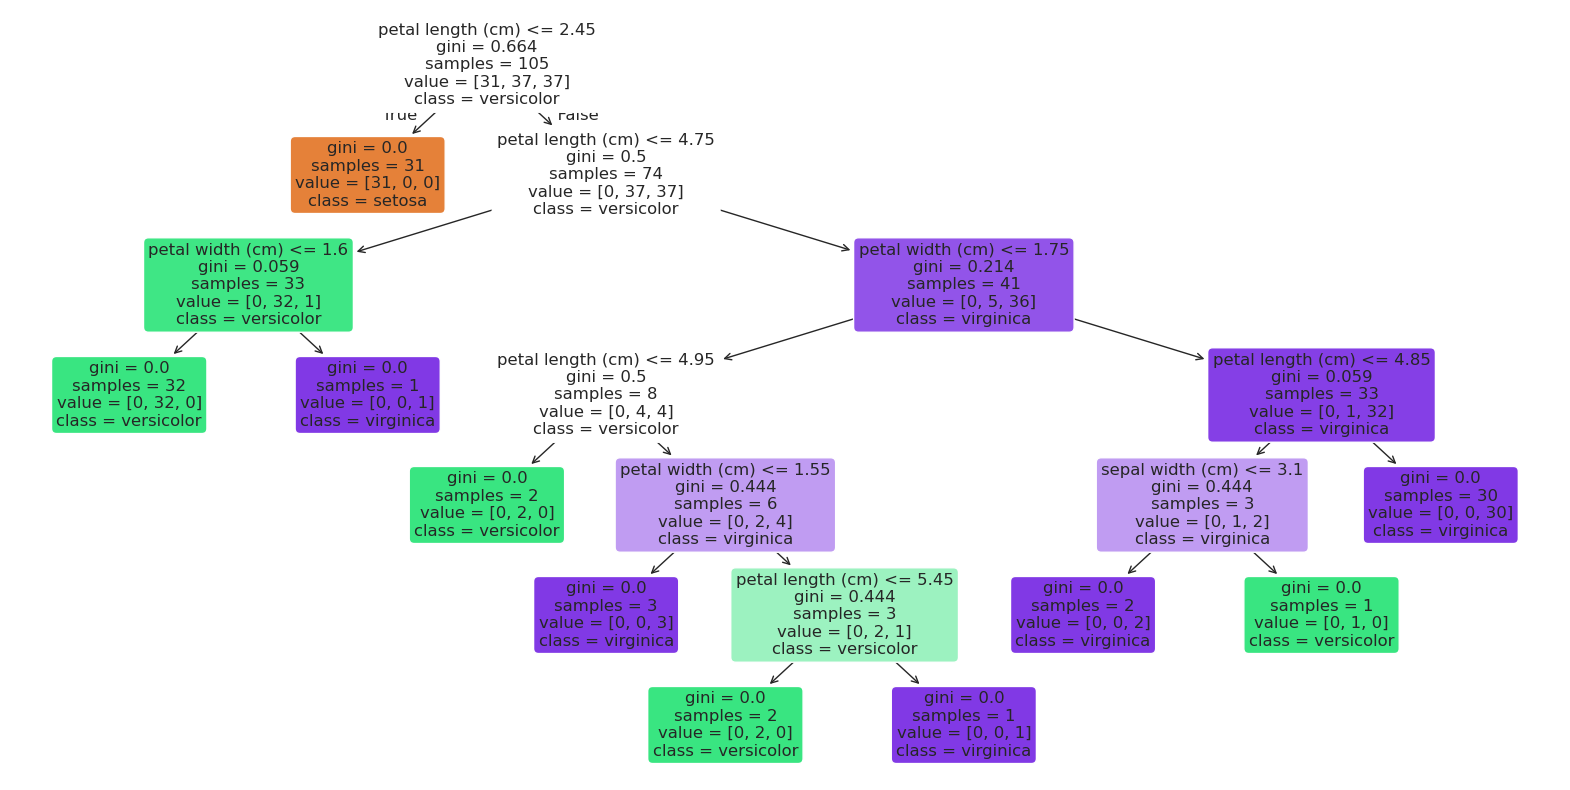

In [11]:
# Visualizar el árbol de decisión
# ================================
# Se llama la función para visualizar el árbol de decision entrenado.
# Permitiendo observar los nodos del mismo
visualizar_arbol(clf, feature_names, target_names)


Analizando un ejemplo específico...

Características de la muestra:
- Sepal length (cm): 6.4 cm
- Sepal width (cm): 3.2 cm
- Petal length (cm): 4.5 cm
- Petal width (cm): 1.5 cm

Especie predicha: versicolor
Probabilidades de predicción:
- setosa: 0.0000
- versicolor: 1.0000
- virginica: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


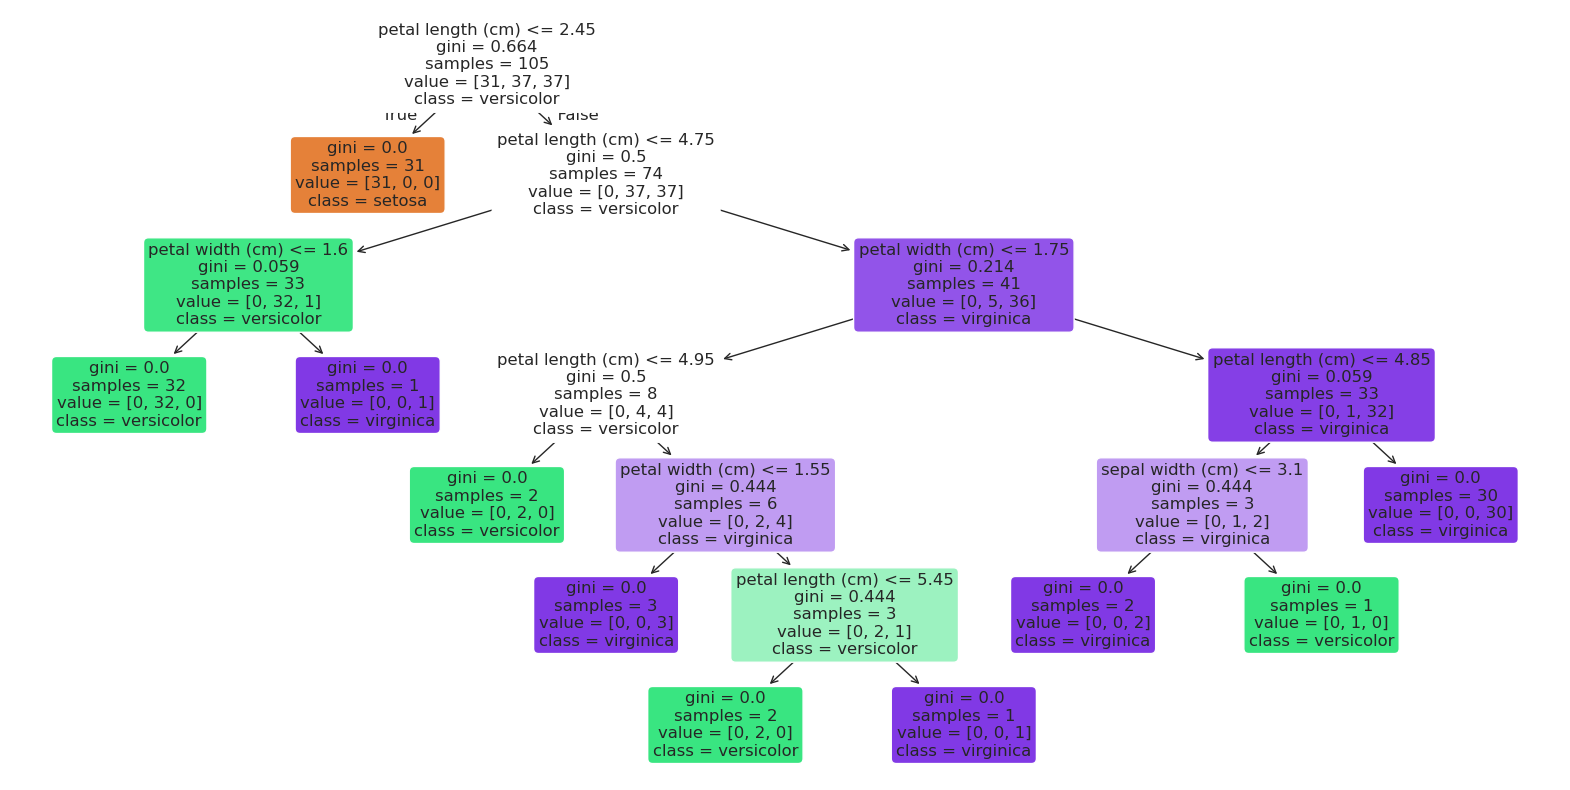


¡Clasificación del dataset de las orquídeas completada!


In [12]:
# Analizar un ejemplo específico
# ===================================
# Se prueba un ejemplo, con el fin de observar el proceso de inferencia.

ejemplo = {
    'sepal length (cm)': 6.4,
    'sepal width (cm)': 3.2,
    'petal length (cm)': 4.5,
    'petal width (cm)': 1.5
}

analizar_ejemplo(clf, ejemplo)

print("\n¡Clasificación del dataset de las orquídeas completada!")